In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('BIP_numerical_NA_groundballs.csv')

In [3]:
data.head()

,Unnamed: 0,Angle,Balls,BatterId,BatterSide,Bearing,Direction,Distance,ExitSpeed,Extension,...,az0,pfxx,pfxz,vx0,vy0,vz0,x0,y0,z0,PlayResult
0,18,-5.922391,1,8889924.0,0,-19.201773,-20.178722,21.666606,97.490851,5.554633,...,-24.184850,-7.167703,4.532321,4.549449,-132.544733,-2.057882,-0.900393,50.0,5.024001,1
1,26,-1.774047,3,8889923.0,0,-0.624332,0.190045,33.651032,102.693597,5.549675,...,-27.875439,-8.148385,2.540020,3.805335,-130.072649,-3.208802,-0.929982,50.0,4.863850,1
2,45,1.533179,0,8886492.0,1,-35.946978,-36.397544,85.709892,105.944197,5.319046,...,-20.746829,-6.663711,7.210305,3.031739,-125.632839,-5.523133,-0.748560,50.0,6.104358,0
3,79,0.637003,0,8881734.0,1,-21.944780,-23.739582,63.686716,96.677192,5.457647,...,-22.773421,-6.384098,5.930880,4.710888,-125.941587,-4.733929,-0.642638,50.0,6.079939,1
4,98,-24.694851,0,8889924.0,0,-4.367928,-0.334215,4.359958,92.736971,5.575303,...,-22.179950,-3.843251,5.970415,2.001054,-130.192063,-4.413091,-0.664901,50.0,5.262697,1


In [4]:
data = data.loc[:, data.columns != 'Unnamed: 0']

In [5]:
data.head()

,Angle,Balls,BatterId,BatterSide,Bearing,Direction,Distance,ExitSpeed,Extension,HangTime,...,az0,pfxx,pfxz,vx0,vy0,vz0,x0,y0,z0,PlayResult
0,-5.922391,1,8889924.0,0,-19.201773,-20.178722,21.666606,97.490851,5.554633,0.149565,...,-24.184850,-7.167703,4.532321,4.549449,-132.544733,-2.057882,-0.900393,50.0,5.024001,1
1,-1.774047,3,8889923.0,0,-0.624332,0.190045,33.651032,102.693597,5.549675,0.222021,...,-27.875439,-8.148385,2.540020,3.805335,-130.072649,-3.208802,-0.929982,50.0,4.863850,1
2,1.533179,0,8886492.0,1,-35.946978,-36.397544,85.709892,105.944197,5.319046,0.594855,...,-20.746829,-6.663711,7.210305,3.031739,-125.632839,-5.523133,-0.748560,50.0,6.104358,0
3,0.637003,0,8881734.0,1,-21.944780,-23.739582,63.686716,96.677192,5.457647,0.470486,...,-22.773421,-6.384098,5.930880,4.710888,-125.941587,-4.733929,-0.642638,50.0,6.079939,1
4,-24.694851,0,8889924.0,0,-4.367928,-0.334215,4.359958,92.736971,5.575303,0.025022,...,-22.179950,-3.843251,5.970415,2.001054,-130.192063,-4.413091,-0.664901,50.0,5.262697,1


In [6]:
data['3B'] = 0
data['5_6_Hole'] = 0
data['SS'] = 0
data['Up_the_Middle'] = 0
data['2B'] = 0
data['3_4_Hole'] = 0
data['1B'] = 0

In [7]:
data.loc[((data['Direction'] > -45) & (data['Direction'] < -33.75)), '3B'] = 1
data.loc[((data['Direction'] > -33.75) & (data['Direction'] < -22.5)), '5_6_Hole'] = 1
data.loc[((data['Direction'] > -22.5) & (data['Direction'] < -11.25)), 'SS'] = 1
data.loc[((data['Direction'] > -11.25) & (data['Direction'] < 11.25)), 'Up_the_Middle'] = 1
data.loc[((data['Direction'] > 11.25) & (data['Direction'] < 22.5)), '2B'] = 1
data.loc[((data['Direction'] > 22.5) & (data['Direction'] < 33.75)), '3_4_Hole'] = 1
data.loc[((data['Direction'] > 33.75) & (data['Direction'] < 45)), '1B'] = 1

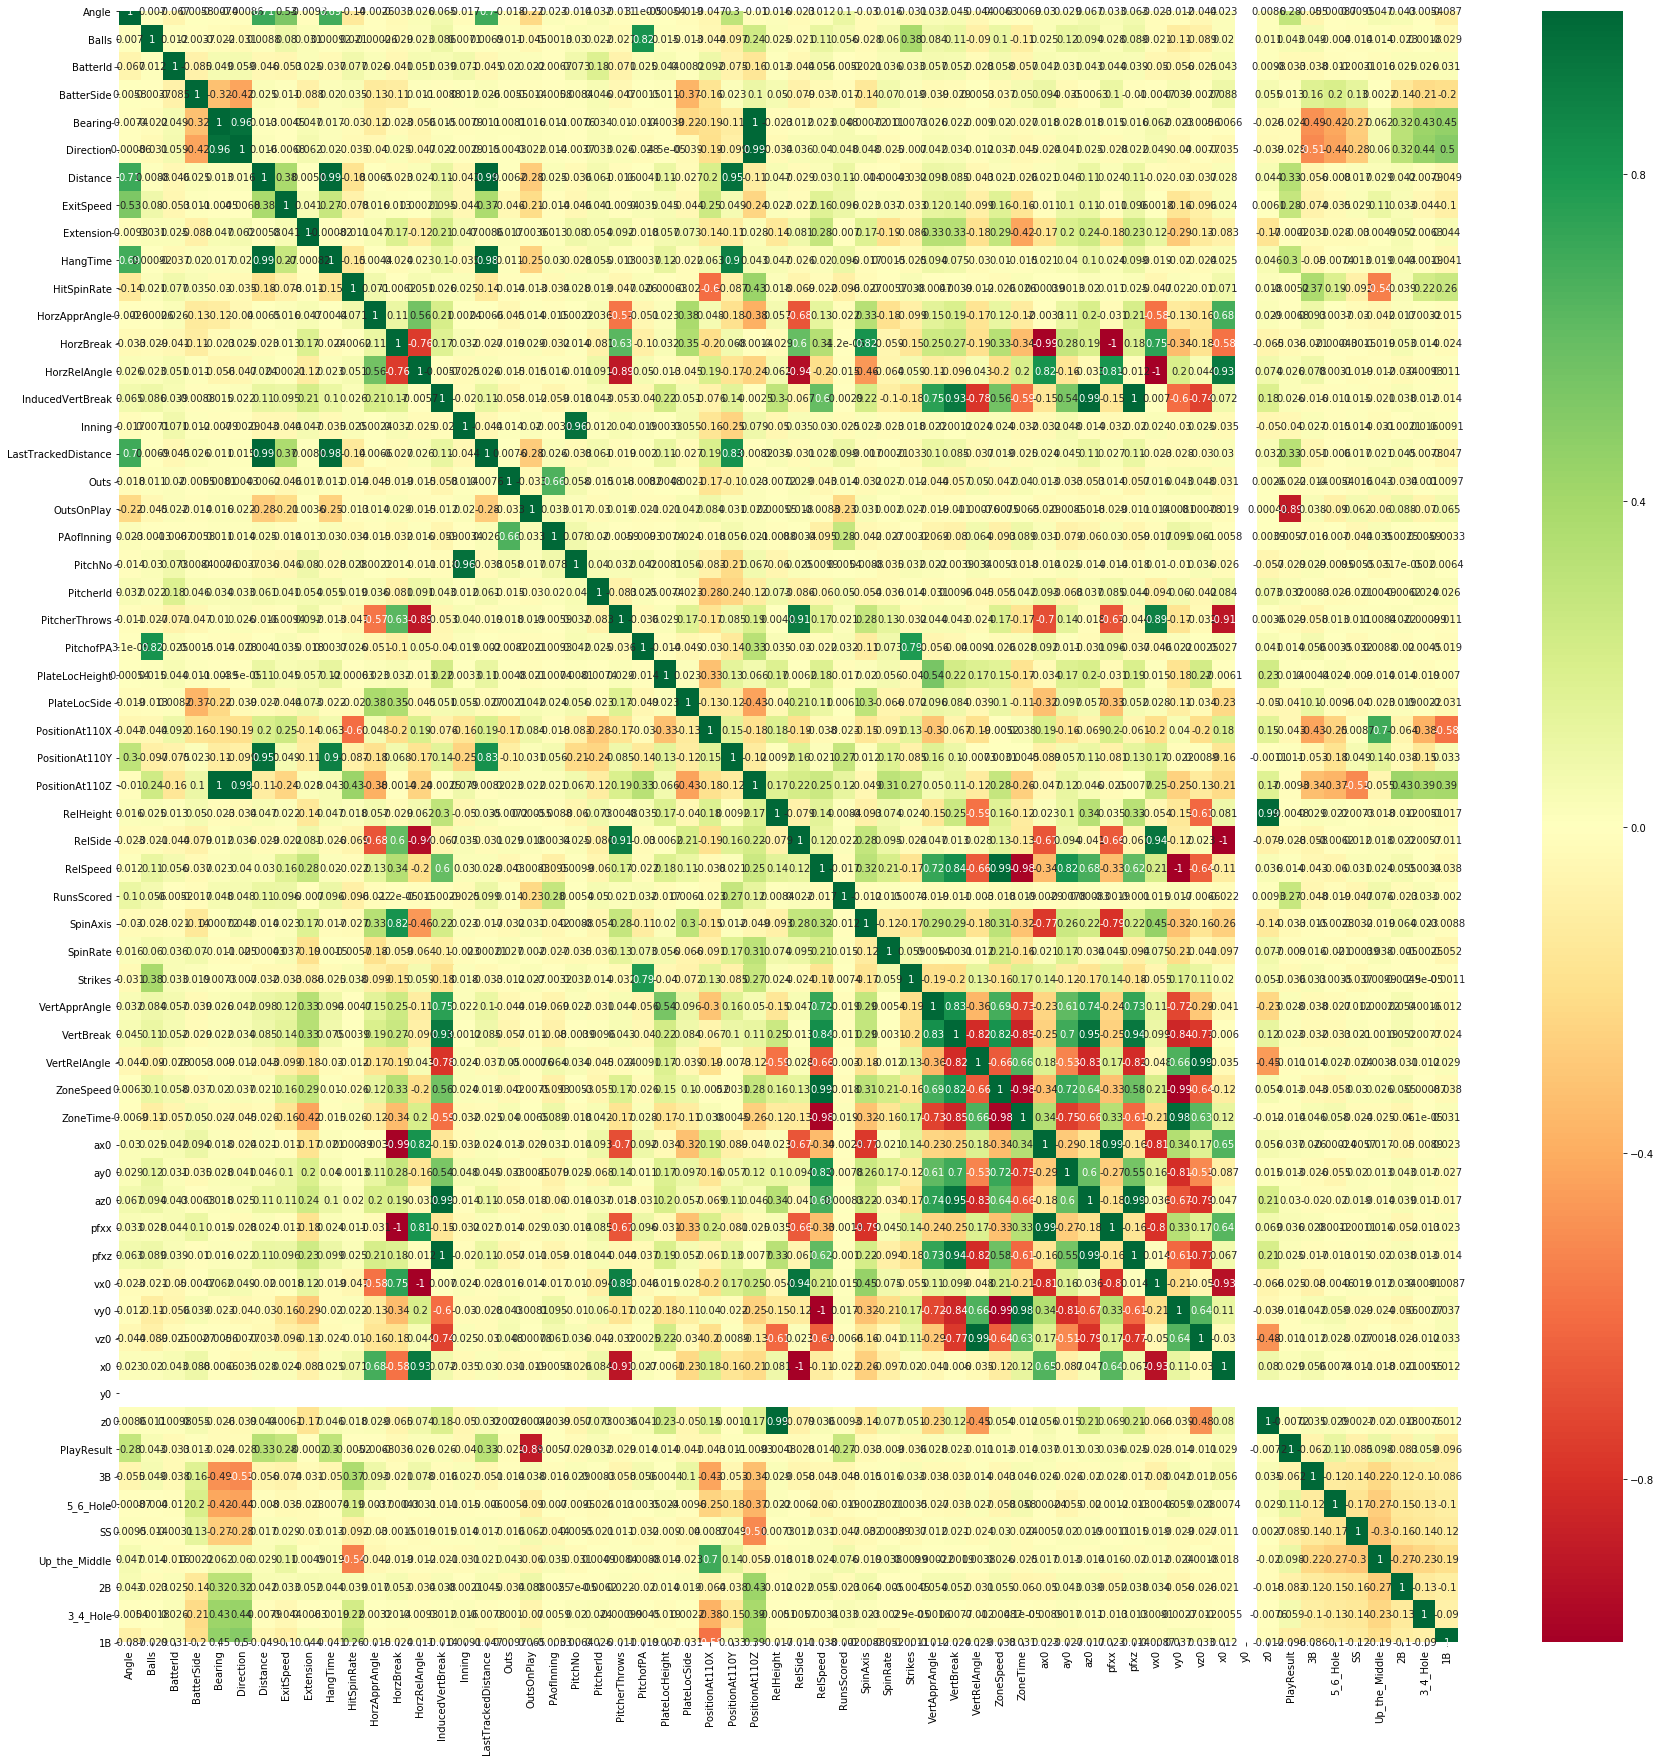

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
play_result = corrmat.index[-1]
plt.figure(figsize = (30,30))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
corr = data[top_corr_features].corr()

In [10]:
corr.to_csv('corr_strategic_groundballs.csv')

In [11]:
data.to_csv('BIP_numerical_NA_groundballs.csv')